In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
!pip install chardet
import chardet

In [16]:
df = pd.read_csv(r"C:\Users\sk062\Documents\Data\Google Search\Search.csv")
Data = pd.DataFrame(df)

In [19]:
Data.describe()

,AIR JORDAN,AIR FORCE,AIR MAX,DUNK
count,262.000000,262.000000,262.000000,262.000000
mean,48.667939,30.637405,44.835878,7.522901
std,9.574493,8.460536,13.273998,5.787873
min,19.000000,15.000000,22.000000,2.000000
25%,43.000000,23.250000,34.250000,4.000000
50%,48.000000,30.500000,43.000000,6.000000
75%,53.000000,37.000000,52.000000,8.000000
max,94.000000,60.000000,100.000000,32.000000


In [21]:
Data["Data"] = pd.to_datetime(Data["Data"])
Data.dtypes

Data          datetime64[ns]
AIR JORDAN             int64
AIR FORCE              int64
AIR MAX                int64
DUNK                   int64
dtype: object

In [22]:
TIME = Data["Data"]
AIR_JORDAN = Data["AIR JORDAN"]
AIR_FORCE = Data["AIR FORCE"]
AIR_MAX = Data["AIR MAX"]
DUNK = Data["DUNK"]

C:\Users\sk062\AppData\Local\Temp\ipykernel_11348\3549564020.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


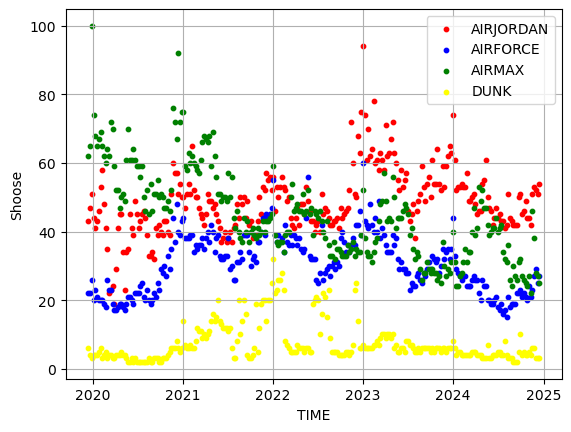

In [29]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter( TIME , AIR_JORDAN , s = 10 , c = "red" , marker='o' , label = "AIRJORDAN")
ax.scatter( TIME , AIR_FORCE , s = 10 ,  c = "Blue" , marker='o' , label = "AIRFORCE")
ax.scatter( TIME , AIR_MAX , s = 10 ,  c = "green", marker='o' , label = "AIRMAX")
ax.scatter( TIME , DUNK , s = 10 ,  c = "yellow", marker='o' , label = "DUNK")

ax.set_xlabel('TIME')
ax.set_ylabel('Shoose')

ax.grid(True)

ax.legend(loc='upper right')

fig.show()

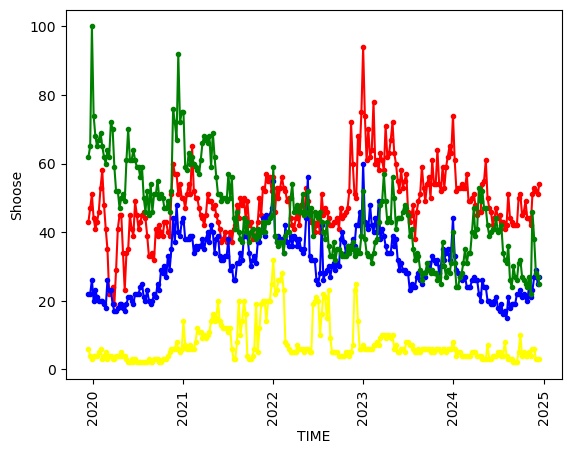

In [37]:
fig, ax = plt.subplots()
plt.xticks(rotation=90)

ax.plot( TIME , AIR_JORDAN , c = "red" , marker='o' , markersize = 3 , label = "AIRJORDAN")
ax.plot( TIME , AIR_FORCE , c = "Blue" , marker='o' , markersize = 3 , label = "AIRFORCE")
ax.plot( TIME , AIR_MAX , c = "green", marker='o' , markersize = 3 , label = "AIRMAX")
ax.plot( TIME , DUNK , c = "yellow", marker='o' , markersize = 3 , label = "DUNK")

ax.set_xlabel('TIME')
ax.set_ylabel('Shoose')

plt.show()

In [39]:
# 一年区切りで相関を取る
# 時系列で相関を取る

In [48]:
drop_data = Data.drop( "Data" , axis =1 )

In [49]:
# 単相関係数
drop_data.corr(method='pearson')

,AIR JORDAN,AIR FORCE,AIR MAX,DUNK
AIR JORDAN,1.000000,0.541493,-0.216011,0.128218
AIR FORCE,0.541493,1.000000,0.064255,0.475298
AIR MAX,-0.216011,0.064255,1.000000,-0.022517
DUNK,0.128218,0.475298,-0.022517,1.000000


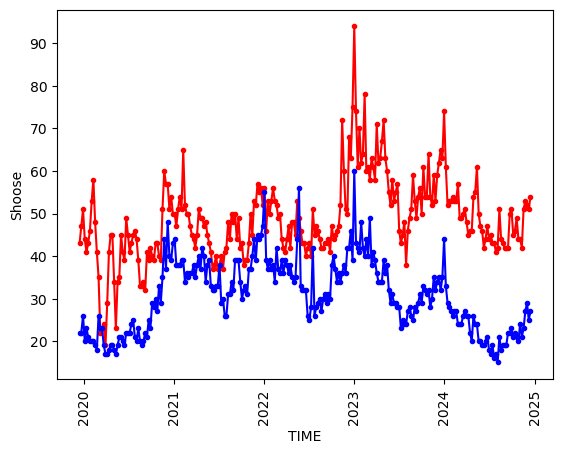

In [50]:
fig, ax = plt.subplots()
plt.xticks(rotation=90)

ax.plot( TIME , AIR_JORDAN , c = "red" , marker='o' , markersize = 3 , label = "AIRJORDAN")
ax.plot( TIME , AIR_FORCE , c = "Blue" , marker='o' , markersize = 3 , label = "AIRFORCE")

ax.set_xlabel('TIME')
ax.set_ylabel('Shoose')

plt.show()

In [51]:
Data.head()

,Data,AIR JORDAN,AIR FORCE,AIR MAX,DUNK
0,2019-12-15,43,22,62,6
1,2019-12-22,47,22,65,4
2,2019-12-29,51,26,100,3
3,2020-01-05,44,20,74,4
4,2020-01-12,41,23,68,4


In [53]:
df_time = df.drop(range(0,3))
df_time.head()

,Data,AIR JORDAN,AIR FORCE,AIR MAX,DUNK
3,2020/1/5,44,20,74,4
4,2020/1/12,41,23,68,4
5,2020/1/19,43,21,65,4
6,2020/1/26,46,20,67,5
7,2020/2/2,53,20,69,6


In [54]:
df_time["Moving_Avg"] = df_time["AIR JORDAN"].rolling(window = 4).mean()

In [55]:
df_time.head()

,Data,AIR JORDAN,AIR FORCE,AIR MAX,DUNK,Moving_Avg
3,2020/1/5,44,20,74,4,NaN
4,2020/1/12,41,23,68,4,NaN
5,2020/1/19,43,21,65,4,NaN
6,2020/1/26,46,20,67,5,43.50
7,2020/2/2,53,20,69,6,45.75
